### Data Visualization with Python Exercise

#### Importing Libraries & data 

In [8]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
# Creating a path

path = r'C:\Users\Low_Ky_Savage_\Documents\CareerFoundry\03-04-2023 Instacart Basket Analysis'

In [10]:
# Importing orders_products_all.pkl

df = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'orders_products_merged_aggregated.pkl'))

In [11]:
df.shape

(32404859, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 22 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0.1            int64   
 1   Unnamed: 0              int64   
 2   order_id                int64   
 3   user_id                 int64   
 4   order_number            int64   
 5   orders_day_of_week      int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id              int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  max_order               int64   
 17  loyalty_flag            object  
 18  avg_price               float64 
 19  spending_flag           object  
 20  median_freq             float64 
 21  order_

In [13]:
df.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
0,0,0,2539329,1,1,2,8,999.0,196,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,21.0,Non-frequent customer
1,1,1,2398795,1,2,3,7,15.0,196,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,21.0,Non-frequent customer
2,2,2,473747,1,3,3,12,21.0,196,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,21.0,Non-frequent customer
3,3,3,2254736,1,4,4,7,29.0,196,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,21.0,Non-frequent customer
4,4,4,431534,1,5,4,15,28.0,196,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,21.0,Non-frequent customer


#### Bar Chart

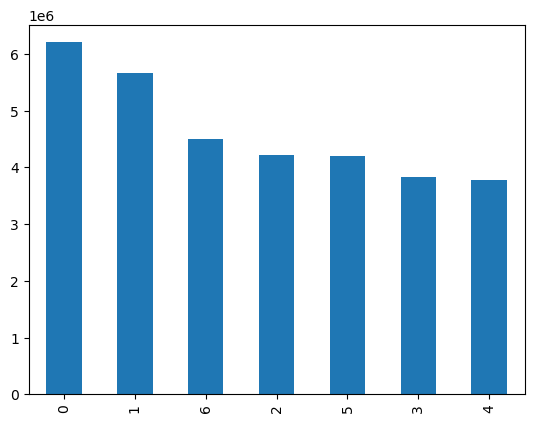

In [14]:
# Creating Histogram 
bar = df['orders_day_of_week'].value_counts().plot.bar()

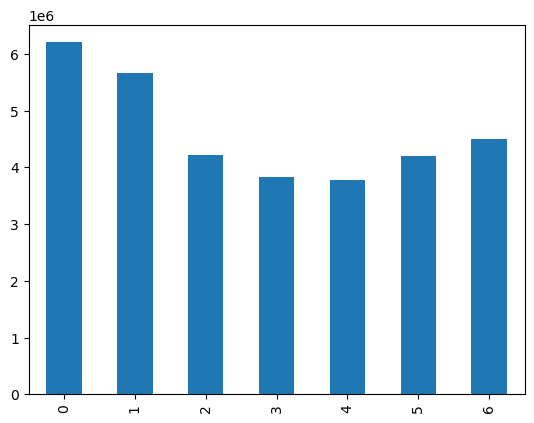

In [16]:
# Sorting by index number rather than by decreasing frequency

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

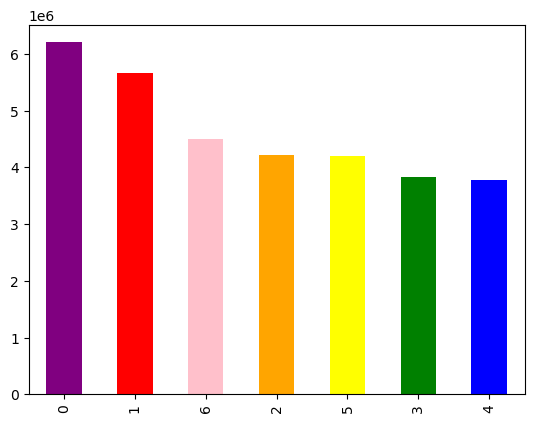

In [17]:
# Adding color

bar = df['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [18]:
# Exporting as a png to the Visualizations folder

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### Histograms

<AxesSubplot:ylabel='Frequency'>

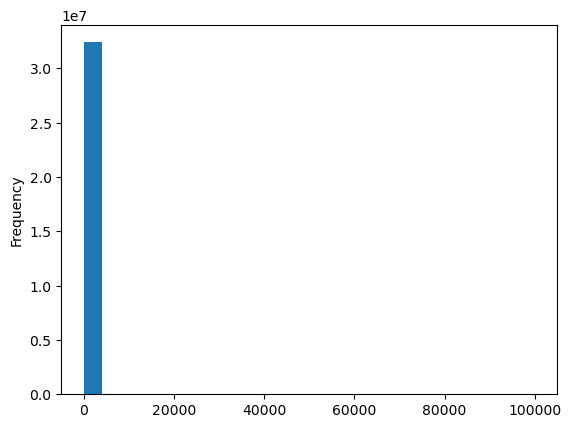

In [20]:
# Creating a histogram of the 'prices' column with 25 bins

df['prices'].plot.hist(bins = 25)

#### Scatterplots

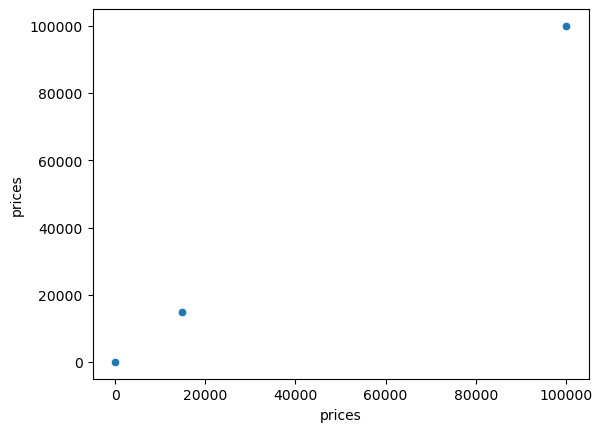

In [21]:
# Creating a scatterplot of price v price

scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [22]:
# Determining whether there are any values above a certain threshold in data
df.loc[df['prices']>100, 'prices'] = np.nan

In [23]:
# Double check that this worked

df['prices'].max()

25.0

#### Histogram: Prices column bin 25 & 70 

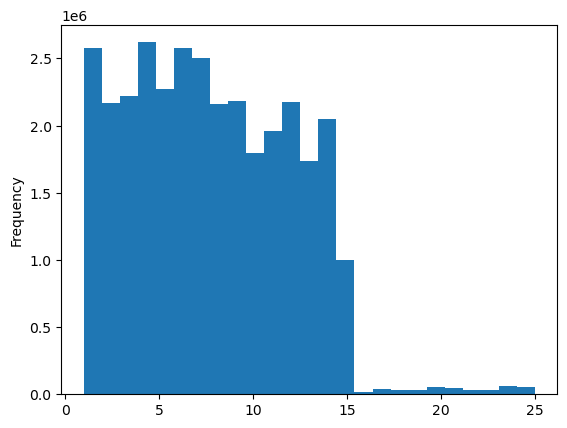

In [24]:
# Histogram with prices column bin 25
hist = df['prices'].plot.hist(bins = 25)

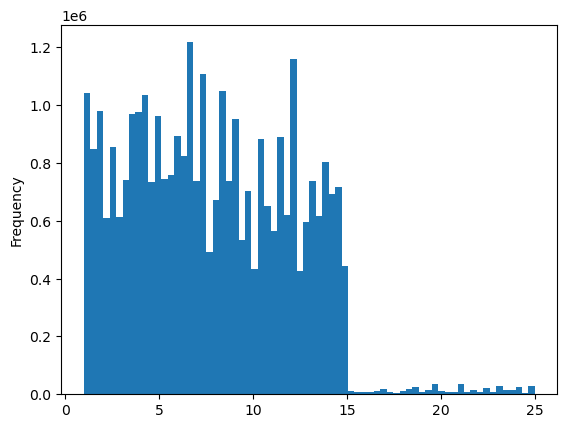

In [25]:
# Histogram with prices column bin 70
hist = df['prices'].plot.hist(bins = 70)

In [26]:
# Export the histogram

hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_prices_70.png' ))

#### Line Chart 

In [27]:
# Create a line chart
# Creating a random sample 

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [28]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [30]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(df)) <= 0.7

In [31]:
# Store 70% of sample in the dataframe big

big = df[dev]

In [32]:
# Store 30% of sample in the dataframe small

small = df[~dev]

In [33]:
# Check length of the entire dataframe

len(df)

32404859

In [34]:
# Check length of the sample dataframe

len(big)+len(small)

32404859

In [35]:
# Divide the database futher into only the columns we need to make the line chart

df_2 = small [['orders_day_of_week', 'prices']]

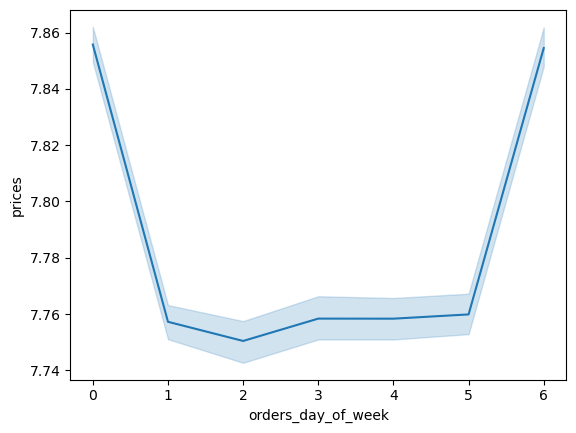

In [36]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [37]:
# Exporting line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_by_day_line.png'))